# Visualization of Financial Data

Xin Wu

### Install latest update

Install latest development version via
```
$pip install git+https://github.com/pydata/pandas-datareader.git
```

### Read data

In [12]:
import numpy as np
import pandas as pd
import pandas_datareader
from pandas_datareader.data import DataReader
from datetime import datetime

In [13]:
start = datetime(2016, 1, 1)
end = datetime.now()
ticker = "AAPL"
datasource = "yahoo"
apple = DataReader(ticker, datasource, start, end)

In [14]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,100.274513
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,97.761681
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,95.848511
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,91.803276
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,92.288696


In [15]:
type(apple)

pandas.core.frame.DataFrame

In [16]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658 entries, 2016-01-04 to 2018-08-13
Data columns (total 6 columns):
High         658 non-null float64
Low          658 non-null float64
Open         658 non-null float64
Close        658 non-null float64
Volume       658 non-null float64
Adj Close    658 non-null float64
dtypes: float64(6)
memory usage: 36.0 KB


In [17]:
#nf = df.reset_index()
#nf.head()x

Reset index to make ```Date``` as a new column. Might not be useful.

In [18]:
apple.index = pd.to_datetime(apple.index)

In [19]:
apple.head(6)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,100.274513
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,97.761681
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,95.848511
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,91.803276
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,92.288696
2016-01-11,99.059998,97.339996,98.970001,98.529999,49739400.0,93.783073


In [20]:
apple.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,100.274513
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,97.761681
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,95.848511
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,91.803276
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,92.288696


In [21]:
newindex = np.arange(apple.shape[0])
newapple = apple.set_index([newindex, apple.index])
newapple.head()

,,High,Low,Open,Close,Volume,Adj Close
,Date,,,,,,
0,2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,100.274513
1,2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,97.761681
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,95.848511
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,91.803276
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,92.288696


Share 2 indices.

In [22]:
type(newapple)

pandas.core.frame.DataFrame

In [23]:
newapple["Adj Close"][0]

Date
2016-01-04    100.274513
Name: Adj Close, dtype: float64

In [24]:
apple["Adj Close"].head()

Date
2016-01-04    100.274513
2016-01-05     97.761681
2016-01-06     95.848511
2016-01-07     91.803276
2016-01-08     92.288696
Name: Adj Close, dtype: float64

or use ```tab``` to search what I can use. For example, input ```df.``` and hit ```tab```, select ```df.high```.

In [25]:
pd.DataFrame(apple["Adj Close"]).head()

,Adj Close
Date,
2016-01-04,100.274513
2016-01-05,97.761681
2016-01-06,95.848511
2016-01-07,91.803276
2016-01-08,92.288696


Convert type to Data frame.

In [27]:
apple.dropna().shape

(658, 6)

Shape is same as before. No na data. Better try other ```na``` codes by yourself to see how it works.

### Visualizing Stock Data

#### Basic plot

In [28]:
import matplotlib.pyplot as plt   # Import matplotlib
import seaborn as sns # for some better plots
%matplotlib inline  
# this is for jupyter notebook. plot shown in line
# plt.style.use('ggplot') # use ggplot style for matplotlib.pylot

In [30]:
close = apple["Adj Close"]

In [31]:
close.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10', '2018-08-13'],
              dtype='datetime64[ns]', name='Date', length=658, freq=None)

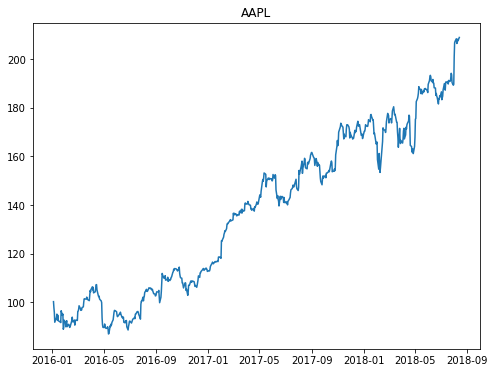

In [32]:
plt.figure(figsize=(8,6)) # control the figure size. length * width
plt.plot(apple['Adj Close'])
plt.title(ticker)
plt.show() # to show this plot

or can use the inner plot code of this pandas.series function. Simply do

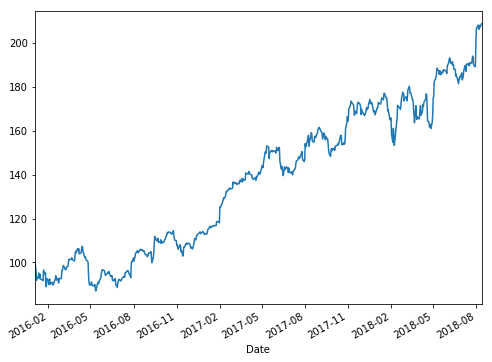

In [33]:
apple["Adj Close"].plot(figsize=(8,6))

Also can try multiple lines.

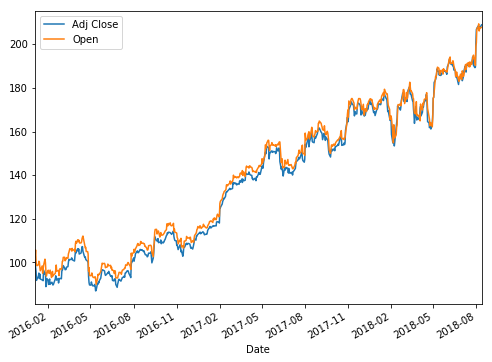

In [34]:
apple[["Adj Close", "Open"]].plot(figsize=(8,6))

In [35]:
microsoft = DataReader("MSFT", "yahoo", start, end)
google = DataReader("GOOG", "yahoo", start, end) 

In [36]:
# Below a DataFrame is created consisting of the adjusted closing price of these stocks, 
#first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})
 
stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,100.274513,741.840027,51.703487
2016-01-05,97.761681,742.580017,51.939362
2016-01-06,95.848511,743.619995,50.995865
2016-01-07,91.803276,726.390015,49.222095
2016-01-08,92.288696,714.469971,49.373062


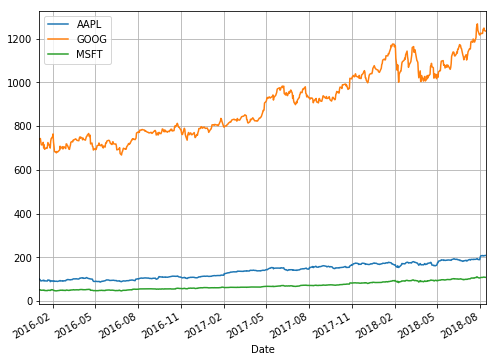

In [37]:
stocks.plot(grid=True, figsize=(8,6))

**Analysis**

While absolute price is important (pricy stocks are difficult to purchase, which affects not only their volatility but your ability to trade that stock), when trading, we are more concerned about the relative change of an asset rather than its absolute price. Google’s stocks are much more expensive than Apple’s or Microsoft’s, and this difference makes Apple’s and Microsoft’s stocks appear much less volatile than they truly are.

One solution would be to use two different scales when plotting the data; one scale will be used by Apple and Microsoft stocks, and the other by Google.

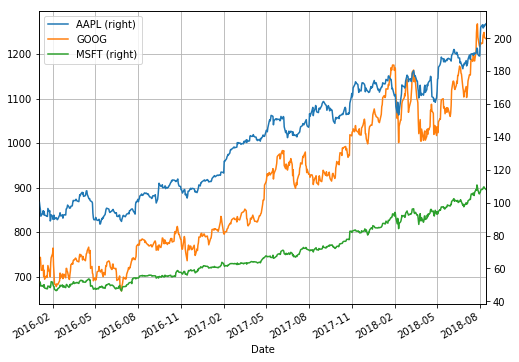

In [38]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True, figsize=(8,6))

Now apple and MSFT are plotted on the right. A “better” solution, though, would be to plot the information we actually want: **the stock’s returns**. This involves transforming the data into something more useful for our purposes. There are multiple transformations we could apply.

One transformation would be to consider the stock’s return since the beginning of the period of interest. In other words, we plot:

$$\text{return}_{t,0} = \frac{\text{Price}_{t}}{\text{Price}_0}$$

This will require transforming the data in the stocks object, which I do next.

In [39]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,0.974940,1.000998,1.004562
2016-01-06,0.955861,1.002399,0.986314
2016-01-07,0.915520,0.979173,0.952007
2016-01-08,0.920360,0.963105,0.954927


where $\lambda$ is a fast way to define map. We can also rewrite this as follows:

In [40]:
def fun2apply(x): # input x is vector
    return(x / x[0])

In [41]:
stock_return = stocks.apply(fun2apply)
stock_return.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,0.974940,1.000998,1.004562
2016-01-06,0.955861,1.002399,0.986314
2016-01-07,0.915520,0.979173,0.952007
2016-01-08,0.920360,0.963105,0.954927


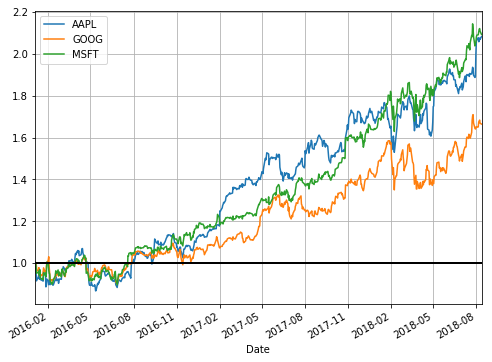

In [42]:
stock_return.plot(grid=True, figsize=(8,6)).axhline(y=1, color = "black", lw = 2)
# axhline is to draw horizon line to plot.

**Analysis**

This is a much more useful plot. We can now see how profitable each stock was since the beginning of the period. Furthermore, we see that these stocks are highly correlated; they generally move in the same direction, a fact that was difficult to see in the other charts.

Alternatively, we could plot the change of each stock per day. One way to do so would be to plot the percentage increase of a stock when comparing day $t$ to day $t + 1$, with the formula:

$$\text{Growth}_t = \frac{\text{Price}_{t+1}-\text{Price}_t}{\text{Price}_t}$$

But change could be thought of differently as:

$$\text{Increase}_t = \frac{\text{Price}_{t}-\text{Price}_{t-1}}{\text{Price}_t}$$

These formulas are not the same and can lead to differing conclusions, but there is another way to model the growth of a stock: with log differences.

$$\text{Change}_t = \log(\text{Price}_t)-\log (\text{Price}_{t-1})$$

The advantage of using log differences is that this difference can be interpreted as the percentage change in a stock but does not depend on the denominator of a fraction.

We can obtain and plot the log differences of the data in stocks as follows:

In [43]:
import numpy as np
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,GOOG,MSFT
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025379,0.000997,0.004552
2016-01-06,-0.019764,0.001400,-0.018332
2016-01-07,-0.043121,-0.023443,-0.035402
2016-01-08,0.005274,-0.016546,0.003062


The first row is NaN, since no previous data to do log.

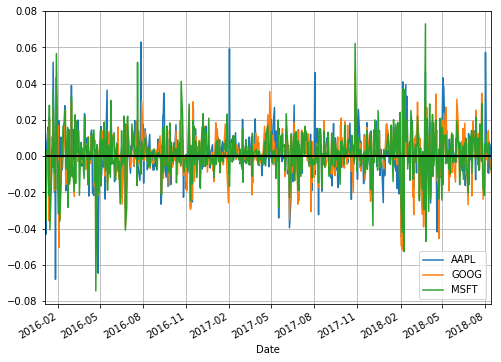

In [44]:
stock_change.plot(grid = True, figsize=(8,6)).axhline(y = 0, color = "black", lw = 2)

#### Do Candle plot

In [45]:
from candle_plot import pandas_candlestick_ohlc
%load_ext autoreload
%autoreload 2

The funtion is defined in this python file. We could import file to run the function. In order to run this file, we need to make sure the data.frame table including columns named by "High", "Low", "Open", "Close". The index is Date type. 

In [46]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,100.274513
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,97.761681
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,95.848511
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,91.803276
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,92.288696


In [47]:
type(apple.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [48]:
apple[["High","Low","Open","Close"]].head()

,High,Low,Open,Close
Date,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998
2016-01-05,105.849998,102.410004,105.750000,102.709999
2016-01-06,102.370003,99.870003,100.559998,100.699997
2016-01-07,100.129997,96.430000,98.680000,96.449997
2016-01-08,99.110001,96.760002,98.550003,96.959999


`candle_plot` is file name, `pandas_candlestick_ohlc` is the function defined in this file. Size parameter = (width, height), and default is (12,8).

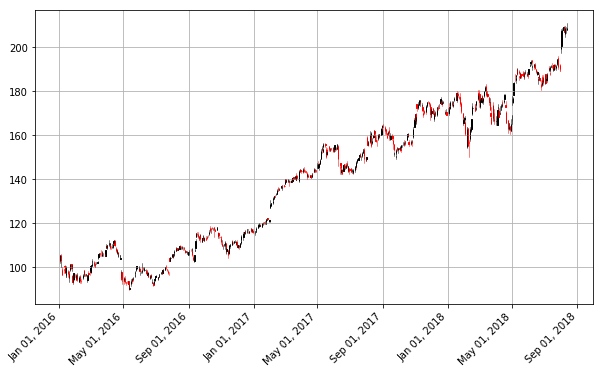

In [49]:
fig = pandas_candlestick_ohlc(apple, stick="day", size=(10,6))

Return value of function is `figure`, and we can save this figure under current directory. Parameter `dpi` is to control the quality of saved graph (figure size).

In [50]:
fig.savefig("apple_stock_day.png", dpi=150)

We can also choose stick="day", "month", "year".

#### Moving average

Charts are very useful. In fact, some traders base their strategies almost entirely off charts (these are the “technicians”, since trading strategies based off finding patterns in charts is a part of the trading doctrine known as **technical analysis**). Let’s now consider how we can find trends in stocks.

A **q-day moving average** is, for a series $x_t$ and a point in time t, the average of the past $q$ days: that is, if MA^q_t denotes a moving average process, then:

$$MA_t^q = \frac{1}{q}\sum_{i=1}^{q-1}X_{t-i}$$

Moving averages smooth a series and helps identify trends. The larger $q$ is, the less responsive a moving average process is to short-term fluctuations in the series $x_t$. The idea is that moving average processes help identify trends from “noise”. **Fast moving averages have smaller $q$** and more closely follow the stock, while **slow moving averages have larger $q$**, resulting in them responding less to the fluctuations of the stock and being more stable.

pandas provides functionality for easily computing moving averages. I demonstrate its use by creating a 20-day (one month) moving average for the Apple data, and plotting it alongside the stock.

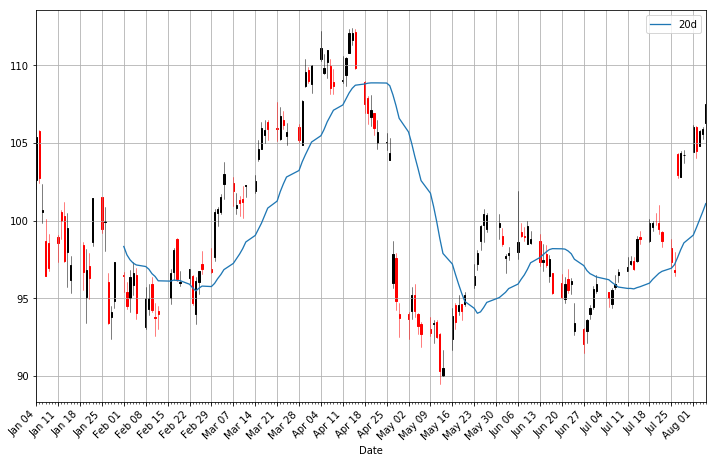

In [52]:
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
# build a new column named "20d" by using moving average, q = 20. 
fig20d = pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d") 
# apple.loc['2016-01-04':'2016-08-07',:] is to constrain dates within this interval, otherseries is defined in function, 
# add more lines

In [53]:
fig.savefig("apple_stock_20d.png", dpi=150)

Notice how late the rolling average begins. It cannot be computed until 20 days have passed. This limitation becomes more severe for longer moving averages. Because I would like to be able to compute 200-day moving averages, I’m going to extend out how much AAPL data we have. That said, we will still largely focus on 2016.

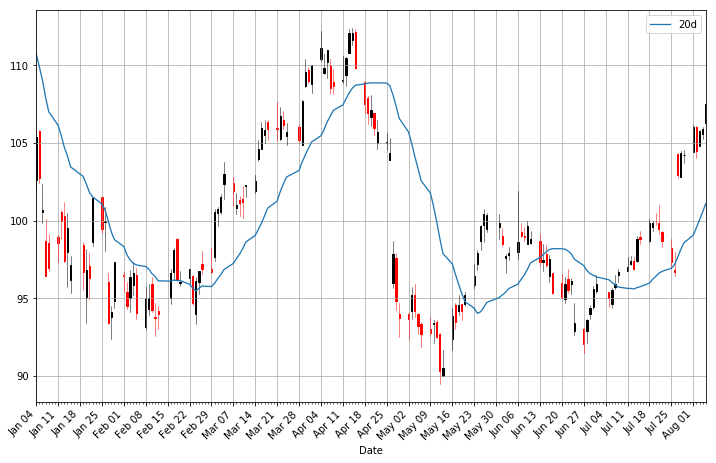

In [56]:
start = datetime(2010,1,1) # change start date
apple = DataReader("AAPL", "yahoo", start, end)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
 
fig20d_new = pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d")

You will notice that a moving average is much smoother than the actua stock data. Additionally, it’s a stubborn indicator; a stock needs to be above or below the moving average line in order for the line to change direction. Thus, crossing a moving average signals a possible change in trend, and should draw attention.



Traders are usually interested in multiple moving averages, such as the 20-day, 50-day, and 200-day moving averages. It’s easy to examine multiple moving averages at once.

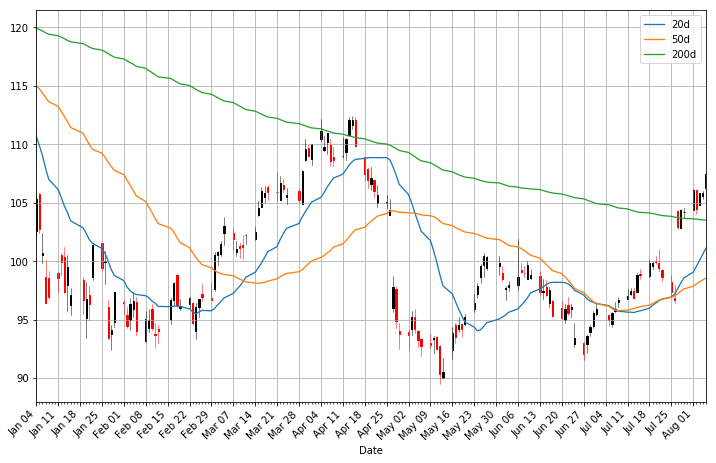

In [57]:
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Close"].rolling(window = 200, center = False).mean(), 2)
 
figmore = pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = ["20d", "50d", "200d"])

In [61]:
figmore.savefig("fig_move.png", dpi=200, bbox_inches='tight') # tight layout: figure frame box tight

(plot knowledge is simple, assign new columns to ```apple``` matrix, and add to otherseries argument to do plots.)

The 20-day moving average is the most sensitive to local changes, and the 200-day moving average the least. Here, the 200-day moving average indicates an overall **bearish** trend: the stock is trending downward over time. The 20-day moving average is at times bearish and at other times **bullish**, where a positive swing is expected. You can also see that the crossing of moving average lines indicate changes in trend. These crossings are what we can use as **trading signals**, or indications that a financial security is changing direction and a profitable trade might be made.

Credit to original website: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/